## **<span style="color:blue">University of Management & Technology</span>**
### <span>Deep Learning & Neural Networks</span>
### Assignment 1

<table style="width:100%; border-collapse:collapse; margin-top:20px; font-family:Arial, sans-serif; border:1px solid #bbb;">

  <tr>
    <th colspan="2" 
        style="background:#0056b3; color:white; text-align:left; 
               padding:10px; font-size:18px; font-weight:bold; 
               border-bottom:1px solid #bbb;">
      Information
    </th>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold; width:30%;">Student Name:</td>
    <td style="padding:10px;">Syed Shahzil</td>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold;">ID:</td>
    <td style="padding:10px;">23018020020</td>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold;">Program:</td>
    <td style="padding:10px;">BSCS Sec A Batch 18 — Semester Fall 25</td>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold;">Course Title:</td>
    <td style="padding:10px;">Deep Learning and Neural Networks</td>
  </tr>

  <tr>
    <td style="padding:10px; font-weight:bold;">Resource Person:</td>
    <td style="padding:10px;">Ms Hina Tufail</td>
  </tr>

</table>

### **_KeyTasks_:**
- Linear Regression (Realestate.csv)
- Logistic Regression (Bank_Customer_Churn_Prediction.csv)

### **_<span style="color:Red">Strategy</span>_**
- I've used **doc_strings** for each function to demonstrate better understanding.
- I've used both **Vectorized** and **Loop** approaches where they are fit better.
- For training **Linear Regression**, MSE is used. But for Evaluation, I've preferred **R2x100** to get a % style accuracy.
- Same as **Cross Entropy** is used to train **Logistic Regression** but for Evaluation, a short conditional trick is used to get the same % style accuracy.
- Unfortunately, the code for preprocessing Realestate Data is lossed Accidently. However, I've preserved it for Logistic Regression Dataset.
-The learning rate **alpha** and **iterations** are managed in such a way to get best results.

### <span style="color:blue">**_Applying Linear Regression on Realestate Dataset_**</span>
- Loading Dataset
- Dataset Spliting 
- h_function()
- cost_function()
- gradient_descent()
- plot_data()

#### **_Importing Libraries_**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

### **_Loading and Spliting Dataset_**
- 70% Train, 30% Test
- I've preprocessed data seprately so I'm loading the cleaned dataset to be trained on **Linear Regression**

In [2]:
data= pd.read_csv("Realestate_processed.csv")
X= data[["X1_year","X1_month_sin","X1_month_cos","X2_house_age","X3_scaled","X4_scaled","distance_scaled"]]
Y= data['Y_house_price_of_unit_area']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=20)


### **_Cost Function_**
- It calculates sum of losses to compute overall cost of model.
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

In [3]:
def cost_func(x, y, w, b): 
    """
    cost_func computes the cost for linear regression
    Args:
      x (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = x.shape[0]
    f_wb= np.dot(x, w) + b
    cost = (1/(2*m)) * np.sum((f_wb - y)**2)                                    #scalar    
    return cost

### **_Gradiant Descent_**
- This will involve gradiant calculation.
- Multiplying gradiants with learning rate.
- Updating Paramerters.

In [4]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = x.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    cost_history = []
    w = w_in
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw =compute_gradient(x, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
        if i<100000:      # prevent resource exhaustion 
            cost_history.append( cost_func(x, y, w, b))
            print(f"Gradient {i+1}- cost={cost_history[-1]}")  
    return w, b, cost_history


### **_h_function()_**
- Performs predictions on training data

In [6]:
def h_function(x, w, b):
    """
    h_function performs predictions on training data
    Args:
      x (ndarray (m,n)): Data, m examples with n features
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      predictions (ndarray (m,)): predicted values
    """
    predictions = np.dot(x, w) + b
    return predictions

In [7]:
from sklearn.metrics import r2_score

In [8]:
w, b, cost_history = gradient_descent(np.array(X_train), np.array(Y_train),np.zeros(X_train.shape[1]), 0.0, 1, 50)
predictions = h_function(np.array(X_train), w, b)
Accuracy= r2_score(Y_train, predictions)
print("R2 Score on Training Data: ", Accuracy*100)
predictions2 = h_function(np.array(X_test), w, b)
Accuracy2= r2_score(Y_test, predictions2)
print("R2 Score on Test Data: ", Accuracy2*100)



Gradient 1- cost=91.66642793344653
Gradient 2- cost=48.683787155912626
Gradient 3- cost=45.3512793226635
Gradient 4- cost=44.606879932911006
Gradient 5- cost=44.15019827917998
Gradient 6- cost=43.80548241503333
Gradient 7- cost=43.5366511828921
Gradient 8- cost=43.32322484967995
Gradient 9- cost=43.150750865362305
Gradient 10- cost=43.00879389275358
Gradient 11- cost=42.88978964871357
Gradient 12- cost=42.78823953711604
Gradient 13- cost=42.70013296899245
Gradient 14- cost=42.62253219998499
Gradient 15- cost=42.55327385716123
Gradient 16- cost=42.49075429662976
Gradient 17- cost=42.43377519261333
Gradient 18- cost=42.38143240598751
Gradient 19- cost=42.33303595483834
Gradient 20- cost=42.28805233913131
Gradient 21- cost=42.24606293503667
Gradient 22- cost=42.206733943982655
Gradient 23- cost=42.169794652594454
Gradient 24- cost=42.13502167273725
Gradient 25- cost=42.10222748677444
Gradient 26- cost=42.071252094320485
Gradient 27- cost=42.04195689524846
Gradient 28- cost=42.014220186881

### **_Ploting Cost Function_**

Text(0.5, 1.0, 'Cost Function Convergence')

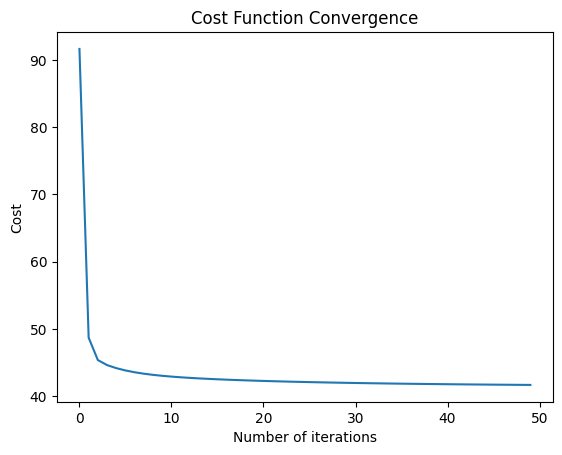

In [9]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")

**_Ploting Regression Plan_**
- I've used PCA to get 2 Features out of 7 
- Then I ploted Regression Plane

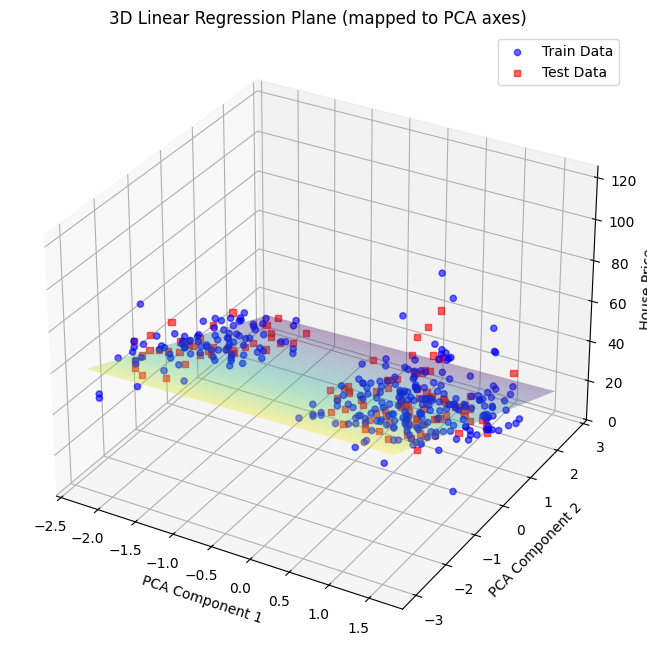

R2 Score on Training Data (mapped to PCA): 39.06%
R2 Score on Test Data (mapped to PCA):     43.47%


In [ ]:

# Fit PCA on training features (2 components for plotting)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(np.array(X_train))
X_test_pca  = pca.transform(np.array(X_test))

w_pca = pca.components_.dot(w)             # shape (2,)
b_pca = pca.mean_.dot(w) + b               # scalar

# Predictions in PCA-space using existing h_function
y_train_pred_pca = h_function(X_train_pca, w_pca, b_pca)
y_test_pred_pca  = h_function(X_test_pca,  w_pca, b_pca)

# 3D plot: PCA comp1, PCA comp2, house price
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], np.array(Y_train), c='blue', marker='o', label='Train Data', alpha=0.6)
ax.scatter(X_test_pca[:, 0],  X_test_pca[:, 1],  np.array(Y_test),  c='red',  marker='s', label='Test Data',  alpha=0.6)

# Create mesh for regression plane in PCA space
pca1_range = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 40)
pca2_range = np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 40)
pca1_mesh, pca2_mesh = np.meshgrid(pca1_range, pca2_range)

# Compute plane using PCA-space coefficients
z_mesh = w_pca[0] * pca1_mesh + w_pca[1] * pca2_mesh + b_pca

ax.plot_surface(pca1_mesh, pca2_mesh, z_mesh, alpha=0.35, cmap='viridis', edgecolor='none')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('House Price')
ax.set_title('3D Linear Regression Plane (mapped to PCA axes)')
ax.legend()
plt.show()

# Print R2 scores (mapped predictions)
print(f"R2 Score on Training Data (mapped to PCA): {r2_score(Y_train, y_train_pred_pca)*100:.2f}%")
print(f"R2 Score on Test Data (mapped to PCA):     {r2_score(Y_test,  y_test_pred_pca)*100:.2f}%")



**_<span style="color:blue">Logistic Regression</span>_**
- Data Preprocessing for **Bank_Customer_Churn_Prediction.csv**
- Spliting Daaset
- Cost Function
- Gradient Descent
- h_function
- Plot Regression line

In [9]:
data2=pd.read_csv("Bank_Customer_Churn_Prediction.csv")
print(data2.isnull().sum())


customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [10]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


In [ ]:
data2=pd.get_dummies(data2,columns=['country','gender'], drop_first=True)



In [12]:
print(data2.head())


   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country_Germany  \
0            1              1         101348.88      1            False   
1            0              1         112542.58      0            False   
2            1              0         113931.57      1            False   
3            0              0          93826.63      0            False   
4            1              1          79084.10      0            False   

   country_Spain  gender_Male  
0          False        False  
1           True        False  
2          Fal

In [15]:
data2[['gender_Male','country_Spain','country_Germany']]= data2[['gender_Male','country_Spain','country_Germany']].astype(int)


In [16]:
print(data2.head())


   customer_id  credit_score  age  tenure    balance  products_number  \
0     15634602           619   42       2       0.00                1   
1     15647311           608   41       1   83807.86                1   
2     15619304           502   42       8  159660.80                3   
3     15701354           699   39       1       0.00                2   
4     15737888           850   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  country_Germany  \
0            1              1         101348.88      1                0   
1            0              1         112542.58      0                0   
2            1              0         113931.57      1                0   
3            0              0          93826.63      0                0   
4            1              1          79084.10      0                0   

   country_Spain  gender_Male  
0              0            0  
1              1            0  
2             

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ['credit_score','age','tenure', 'balance', 'products_number','estimated_salary']
data2[numeric_features] = scaler.fit_transform(data2[numeric_features])


In [19]:
data2[['country_Spain','country_Germany','gender_Male','credit_card','active_member','age','tenure','credit_score','balance','products_number','estimated_salary','churn']].to_csv("Bank_Customer_Churn_Prediction_Processed.csv", index=False)


**_Loading and Spliting Dataset_**

In [18]:
DATA= pd.read_csv("Bank_Customer_Churn_Prediction_Processed.csv")
X= DATA[['country_Spain','country_Germany','gender_Male','credit_card','active_member','age','tenure','credit_score','balance','products_number','estimated_salary']]
Y= DATA['churn']
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=20)


**_Sigmoid Function_**

In [19]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


**_Cost Function for Logistic Loss_**

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \Big[\, y^{(i)} \log(h_\theta(x^{(i)})) \;+\; (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \,\Big]
$$

In [20]:
def compute_cost_logistic(x, y, w, b):
    """
    Computes cost

    Args:
      x (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(x[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
             
    cost = cost / m
    return cost


**_Gradient Descent_**
- Compute Gradient
- Update Parameters
- Reach Global Minimum 

In [21]:
def compute_gradient_logistic(x, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      x (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = x.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  


In [22]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      x (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = w_in 
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(x, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(x, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        print(f"Iteration {i:4d}: Cost {J_history[-1]} w={w} and b={b}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


**_h_function()_**
- Predicts output on training and testing data

In [23]:
def h_func_logis(x, w, b):
    """
    h_func_logis->Predict whether the label is 0 or 1 using learned logistic regression parameters w,b
    """
    m = x.shape[0]
    predictions = np.zeros(m)
    
    for i in range(m):
        z_i = np.dot(x[i], w) + b
        f_wb = sigmoid(z_i)
        predictions[i] = 1 if f_wb >= 0.5 else 0
        
    return predictions


**_Let's perform Model Training and Evaluation_**
- Traing will done using 70% Dataset
- After Training, I'll get prediction for both training and testing Dataset.
- For Evaluation, I'll simply use **y_true==y_test** condition technique to get % Accuracy
- **Note: The Evaluation Technique is only for sake of simplicity regardless of what are metrics being used for Logistic Reg**

In [25]:
w, b, c_histry= gradient_descent(np.array(X_train), np.array(Y_train),np.zeros(X_train.shape[1]), 0.0, 1, 50)
pred_for_train= h_func_logis(np.array(X_train), w, b)
pred_for_test= h_func_logis(np.array(X_test), w, b)
Accuracy_train= np.mean(pred_for_train==np.array(Y_train))*100
Accuracy_test= np.mean(pred_for_test==np.array(Y_test))*100
print("Accuracy on Training Data: ", Accuracy_train)
print("Accuracy on Testing Data: ", Accuracy_test) 

Iteration    0: Cost 0.5321090117169863 w=[-0.08321429 -0.042      -0.17821429 -0.20692857 -0.18178571  0.12045845
 -0.00797206 -0.00415238  0.05459982 -0.02404395  0.00190251] and b=-0.2914285714285714   
Iteration    1: Cost 0.48990664946251544 w=[-0.12323428 -0.04716662 -0.26019485 -0.29255247 -0.27389757  0.21527602
 -0.01260338 -0.00941094  0.09282599 -0.03776177  0.00198709] and b=-0.4254531632225187   
Iteration    2: Cost 0.47246165365911397 w=[-0.14676355 -0.03932375 -0.30619729 -0.33293072 -0.33256539  0.2937262
 -0.0159     -0.01454039  0.12250761 -0.04672922  0.00175067] and b=-0.4994818634115303   
Iteration    3: Cost 0.46294040566569367 w=[-0.16252367 -0.0261966  -0.33567814 -0.3527987  -0.3759073   0.3597795
 -0.01848564 -0.01925481  0.14654256 -0.05285974  0.00153071] and b=-0.5457385502917529   
Iteration    4: Cost 0.45687629878104963 w=[-0.17400042 -0.01082465 -0.35633345 -0.36199013 -0.41104844  0.41566151
 -0.02061124 -0.02348784  0.16630806 -0.05702761  0.0014028

**_Ploting Logistic Cost_**

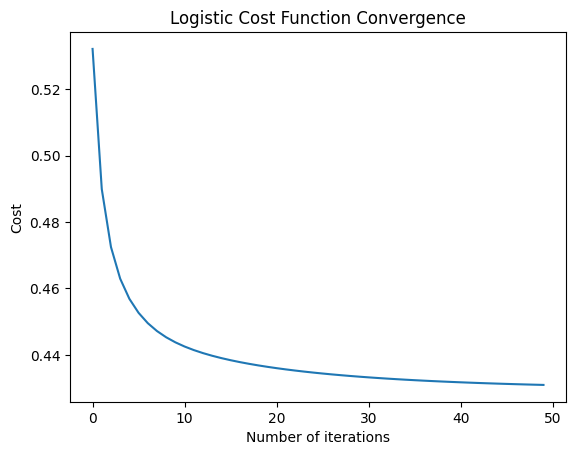

In [26]:
plt.plot(range(len(c_histry)), c_histry)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Logistic Cost Function Convergence")
plt.show()


**_Plotting Regression Plane for Logistic Regression_**

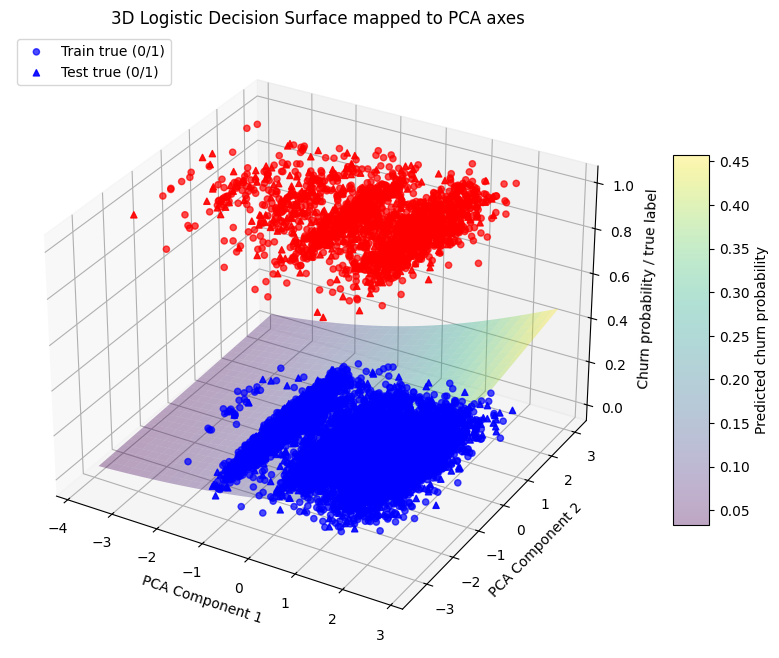

Mapped-model Train accuracy:  79.14285714285715
Mapped-model Test  accuracy:  80.76666666666667
Mapped-model Test  AUC:       0.5960941897800612


In [27]:
# ...existing code...

# PCA-only plotting for logistic regression (use already trained w, b; sigmoid must exist)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(np.array(X_train))
X_test_pca  = pca.transform(np.array(X_test))

# Map original linear coefficients to PCA space: z = X_orig.dot(w) + b ≈ X_pca.dot(pca.components_.dot(w)) + pca.mean_.dot(w) + b
w_pca = pca.components_.dot(w)             # shape (2,)
b_pca = pca.mean_.dot(w) + b               # scalar

# Predicted probabilities (mapped)
y_train_prob_pca = sigmoid(np.dot(X_train_pca, w_pca) + b_pca)
y_test_prob_pca  = sigmoid(np.dot(X_test_pca,  w_pca) + b_pca)

# 3D plot: PCA comp1, PCA comp2, predicted probability surface (and true labels as scatter at z=0/1)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter true labels at z = 0 or 1
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], np.array(Y_train),
           c=np.array(Y_train), cmap='bwr', marker='o', label='Train true (0/1)', alpha=0.7)
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], np.array(Y_test),
           c=np.array(Y_test), cmap='bwr', marker='^', label='Test true (0/1)', alpha=0.9)

# Create mesh for probability surface in PCA space
pca1_range = np.linspace(X_train_pca[:, 0].min(), X_train_pca[:, 0].max(), 60)
pca2_range = np.linspace(X_train_pca[:, 1].min(), X_train_pca[:, 1].max(), 60)
pca1_mesh, pca2_mesh = np.meshgrid(pca1_range, pca2_range)

# Compute probability surface using mapped logistic linear model
z_lin = w_pca[0] * pca1_mesh + w_pca[1] * pca2_mesh + b_pca
z_mesh = 1.0 / (1.0 + np.exp(-z_lin))   # sigmoid

# Plot probability surface
surf = ax.plot_surface(pca1_mesh, pca2_mesh, z_mesh, alpha=0.35, cmap='viridis', edgecolor='none')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('Churn probability / true label')
ax.set_title('3D Logistic Decision Surface mapped to PCA axes')
ax.legend(loc='upper left')

# Colorbar for surface probability
fig.colorbar(surf, shrink=0.6, aspect=10, label='Predicted churn probability')

plt.show()

# Optional: print basic metrics for the mapped probabilities
from sklearn.metrics import roc_auc_score, accuracy_score
y_train_pred_mapped = (y_train_prob_pca >= 0.5).astype(int)
y_test_pred_mapped  = (y_test_prob_pca  >= 0.5).astype(int)
print("Mapped-model Train accuracy: ", accuracy_score(Y_train, y_train_pred_mapped)*100)
print("Mapped-model Test  accuracy: ", accuracy_score(Y_test,  y_test_pred_mapped)*100)
print("Mapped-model Test  AUC:      ", roc_auc_score(Y_test, y_test_prob_pca))
# ...existing code...